In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import feather
from sklearn.utils import shuffle

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC

from scipy.stats import sem

### Import Dataset

In [3]:
data = feather.read_dataframe('LuminalAB Data')

In [4]:
data['cancer'] = label_binarize(data['cancer'], classes=list(set(data['cancer'])))

X = data.drop('cancer', axis=1)
y = data['cancer']

Reduce the dimensionality of the dataset to 10 components

In [19]:
pca = PCA(n_components=10)

model = SVC(gamma='auto', kernel='linear', C=1)

### Compile Model

Compile model, train it on a randomly shuffled training dataset (75% of the original) and test on the remaining heldout 25%. This process is repeated 20 times

In [20]:
def shuffle_and_train(X, y, model):
    accuracy = []
    for _ in range(1, 21):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        X_train_reduced = pca.fit_transform(X_train)
        model.fit(X_train_reduced, y_train)
        
        X_test_reduced = pca.transform(X_test)
        y_pred = model.predict(X_test_reduced)
        score = accuracy_score(y_pred, y_test)
        accuracy.append(score)
    return accuracy

In [21]:
metrics = shuffle_and_train(X, y, model)

In [22]:
iters = np.arange(1, 21, 1)

### Metrics 

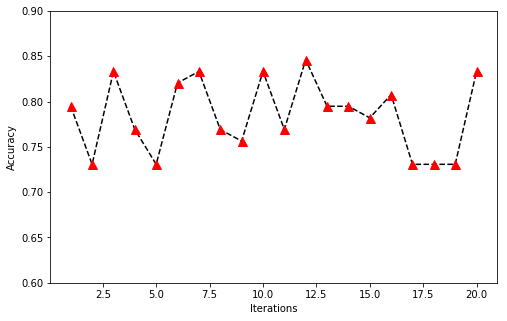

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(np.array(iters), np.array(metrics),'^--', color='black', markeredgecolor='red', markerfacecolor='red',markersize=9)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.ylim(.6, .9)
plt.show()

In [24]:
print('Maximum Accuracy: {0}'.format(np.max(metrics)))
print('Minimum Accuracy: {0}'.format(np.min(metrics)))
print('Mean Accuracy: {0} ± {1}'.format(np.mean(metrics), sem(metrics, axis=None, ddof=0)))

Maximum Accuracy: 0.8461538461538461
Minimum Accuracy: 0.7307692307692307
Mean Accuracy: 0.7846153846153846 ± 0.008863787701253133
